## IE 582 Homework 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
df = pd.read_csv("all_ticks_wide.csv")
df

,timestamp,AEFES,AKBNK,AKSA,AKSEN,ALARK,ALBRK,ANACM,ARCLK,ASELS,...,TTKOM,TUKAS,TUPRS,USAK,VAKBN,VESTL,YATAS,YKBNK,YUNSA,ZOREN
0,2012-09-17T06:45:00Z,22.3978,5.2084,1.7102,3.87,1.4683,1.1356,1.0634,6.9909,2.9948,...,4.2639,0.96,29.8072,1.0382,3.8620,1.90,0.4172,2.5438,2.2619,0.7789
1,2012-09-17T07:00:00Z,22.3978,5.1938,1.7066,3.86,1.4574,1.1275,1.0634,6.9259,2.9948,...,4.2521,0.96,29.7393,1.0382,3.8529,1.90,0.4229,2.5266,2.2462,0.7789
2,2012-09-17T07:15:00Z,22.3978,5.2084,1.7102,NaN,1.4610,1.1356,1.0679,6.9909,2.9855,...,4.2521,0.97,29.6716,1.0463,3.8436,1.91,0.4229,2.5266,2.2566,0.7789
3,2012-09-17T07:30:00Z,22.3978,5.1938,1.7102,3.86,1.4537,1.1275,1.0679,6.9584,2.9855,...,4.2521,0.97,29.7393,1.0382,3.8529,1.91,0.4286,2.5324,2.2619,0.7860
4,2012-09-17T07:45:00Z,22.5649,5.2084,1.7102,3.87,1.4574,1.1356,1.0725,6.9909,2.9760,...,4.2521,0.97,29.8072,1.0382,3.8620,1.90,0.4286,2.5324,2.2619,0.7789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50007,2019-07-23T14:00:00Z,20.4800,7.7300,9.1400,2.47,3.2300,1.2100,2.8400,20.3000,NaN,...,5.6000,4.34,131.6000,1.0500,4.8600,9.98,5.3500,2.7500,4.2500,NaN
50008,2019-07-23T14:15:00Z,20.5000,7.7200,9.1400,2.47,3.2200,1.2100,2.8400,20.3200,NaN,...,5.5700,4.35,131.5000,1.0500,4.8600,9.98,5.3400,2.7500,4.2400,NaN
50009,2019-07-23T14:30:00Z,20.5000,7.7400,9.1300,2.46,3.2300,1.2100,2.8300,20.3400,NaN,...,5.5700,4.36,131.5000,1.0500,4.8600,9.96,5.3400,2.7600,4.2400,NaN
50010,2019-07-23T14:45:00Z,20.4000,7.7000,9.1400,2.47,3.2400,1.2100,2.8200,20.3800,NaN,...,5.5700,4.35,131.3000,1.0400,4.8600,9.94,5.3400,2.7700,4.2400,NaN


#### 4.1. Descriptive Analysis

- Begin by exploring the data to get a feel for its structure, distribution, and potential patterns.

In [3]:
df[['date', 'hours']] = df["timestamp"].str.split("T", expand = True)
df['row_number'] = df.groupby('date').cumcount() + 1

It can be observed that, wide data format has 61 rows for 60 different stocks and one for timestamp which has a frequency of 15 minutes. Let's plot some of them.

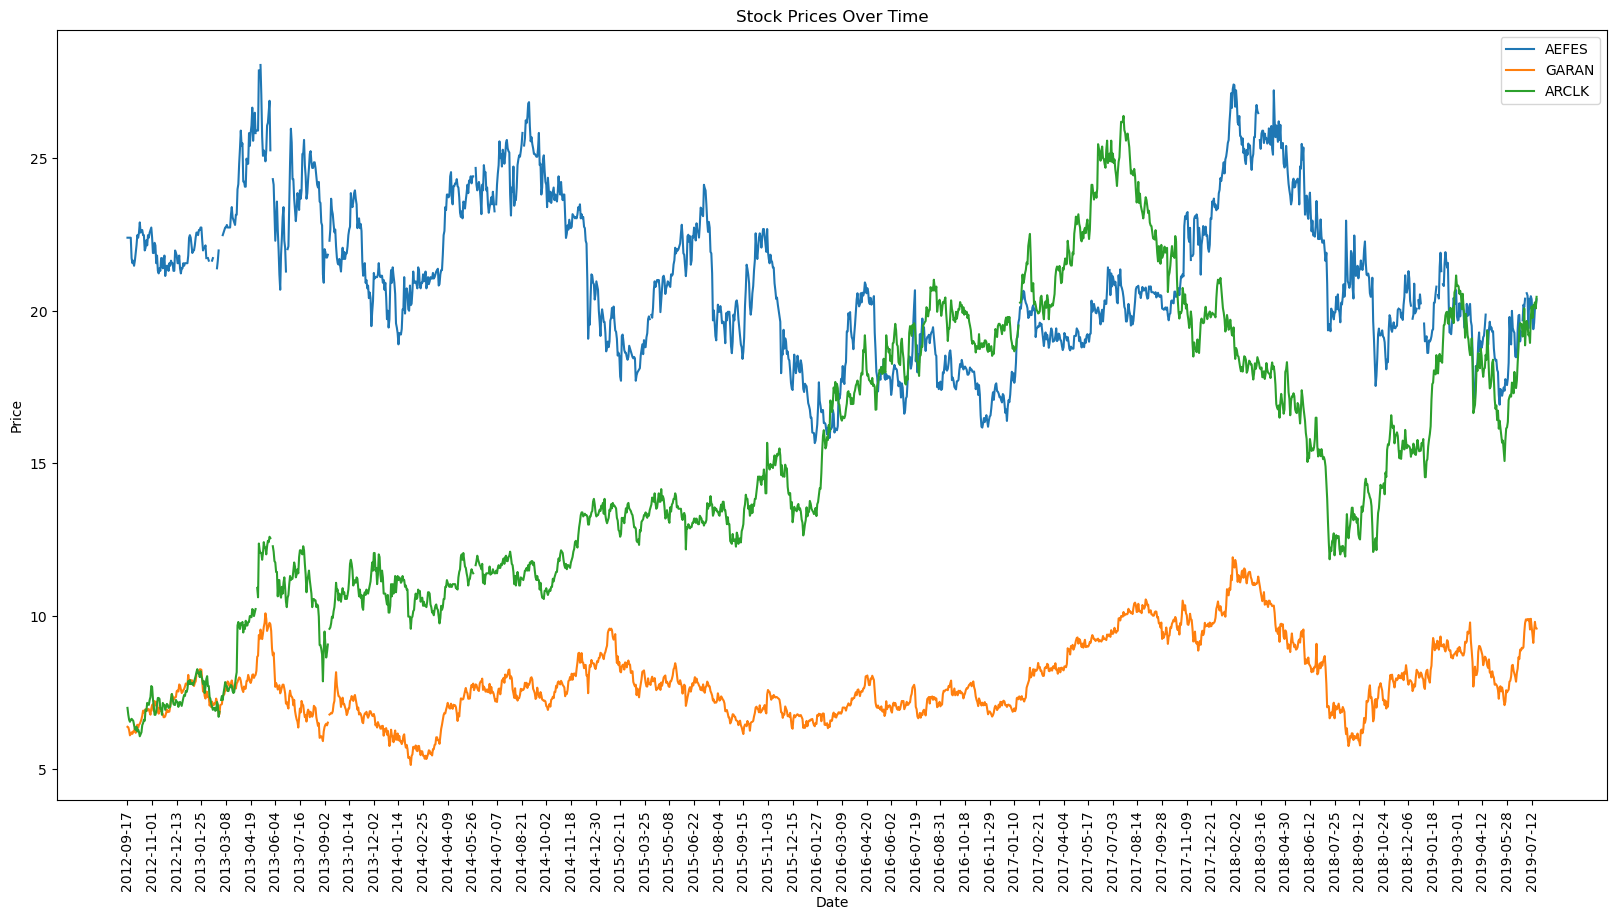

In [4]:
plt.figure(figsize=(20,10))

for i in ["AEFES", "GARAN", "ARCLK"]:
    plt.plot(df[df.row_number == 1].date, df[df.row_number == 1][f"{i}"], label=i)
    
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')

ticks_to_show = df[df.row_number == 1]['date'][::30] 
plt.xticks(ticks=ticks_to_show, rotation = 90)

plt.legend()

plt.show()

In [5]:
print(f" The oldest timestamp is {df.timestamp.min()}, where the newest one is {df.timestamp.max()}.")

 The oldest timestamp is 2012-09-17T06:45:00Z, where the newest one is 2019-07-23T15:00:00Z.


It can be observed form the data "**The oldest timestamp is 2012-09-17T06:45:00Z, where the newest one is 2019-07-23T15:00:00Z.**".  
However, the case could be different for each stock. It is observable that some of the stocks has null values for different timestamps. It is also avaliable in plot.

In [6]:
pd.DataFrame(df.isna().sum().sort_values(), columns=['Missing Values'])\
.drop(["date", "hours", "row_number"], axis = 0)

,Missing Values
timestamp,0
GARAN,704
THYAO,730
YKBNK,787
ISCTR,791
...,...
PGSUS,4791
ICBCT,5676
ISYAT,6828
ISFIN,7135


It is turned out that all stocks have null values, which leads us to the solution that it is better of taking average for each day could make things lots easier for further analyses.  
Let's change the df and move forward.

In [7]:
df_daily = df.groupby("date")[df.columns.drop(["hours", "timestamp", "row_number", "date"])].mean().reset_index()
df_daily

,date,AEFES,AKBNK,AKSA,AKSEN,ALARK,ALBRK,ANACM,ARCLK,ASELS,...,TTKOM,TUKAS,TUPRS,USAK,VAKBN,VESTL,YATAS,YKBNK,YUNSA,ZOREN
0,2012-09-17,22.484581,5.198308,1.698450,3.869474,1.457369,1.133624,1.069786,6.888362,2.981846,...,4.230327,0.966364,29.833158,1.038200,3.853927,1.905000,0.429015,2.529708,2.263204,0.779731
1,2012-09-18,22.289800,5.132092,1.695958,3.934167,1.435972,1.133225,1.088128,6.651981,2.938542,...,4.205854,0.964545,29.510046,1.040144,3.830477,1.904800,0.411985,2.511754,2.277461,0.778104
2,2012-09-19,22.470925,5.055838,1.657827,3.918750,1.407169,1.124492,1.085562,6.571927,2.918335,...,4.237892,0.958800,29.028042,1.039446,3.777665,1.904615,0.408012,2.460042,2.239723,0.765881
3,2012-09-20,22.274196,5.013508,1.700162,3.917600,1.400304,1.132627,1.082715,6.607000,2.959835,...,4.222138,0.957273,28.532931,1.040468,3.701485,1.915000,0.406465,2.420965,2.247833,0.761960
4,2012-09-21,22.199308,5.133754,1.606904,3.917391,1.433608,1.145850,1.091850,6.631950,2.984715,...,4.240248,0.958750,28.848296,1.045642,3.762438,1.934615,0.409944,2.481785,2.317014,0.764800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,2019-07-17,19.639032,7.271290,8.699000,2.348065,3.215806,1.181290,2.866774,20.360000,17.748710,...,5.350937,4.123548,125.958065,1.034839,4.708387,9.725484,5.063226,2.552812,4.272333,1.183548
1713,2019-07-18,20.026129,7.498387,8.880323,2.357097,3.216774,1.203226,2.885484,20.061613,18.229677,...,5.503750,4.223226,127.561290,1.039355,4.853548,9.778387,5.227097,2.668710,4.267419,1.199032
1714,2019-07-19,20.285161,7.649032,9.039000,2.406774,3.265806,1.226774,2.897742,20.265161,18.413226,...,5.632258,4.312903,130.516129,1.045806,4.882187,9.939032,5.419032,2.731290,4.287742,1.210645
1715,2019-07-22,20.462581,7.525484,9.113871,2.430968,3.221290,1.209355,2.853548,20.267097,18.180323,...,5.541250,4.365806,130.038710,1.039355,4.786129,10.024194,5.508065,2.715161,4.253548,1.188125


- Calculate summary statistics for the indices, including measures of central tendency, dispersion, and shape.

In [8]:
mean = df_daily.select_dtypes(include='float64').mean()
median = df_daily.select_dtypes(include='float64').median()
std_dev = df_daily.select_dtypes(include='float64').std()
iqr = df_daily.select_dtypes(include='float64').quantile(0.75) - df_daily.select_dtypes(include='float64').quantile(0.25)
skewness = df_daily.select_dtypes(include='float64').apply(skew)
kurt = df_daily.select_dtypes(include='float64').apply(kurtosis)

summary_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Standard Deviation': std_dev,
    'Interquartile Range': iqr,
    'Skewness': skewness,
    'Kurtosis': kurt
})

summary_df

,Mean,Median,Standard Deviation,Interquartile Range,Skewness,Kurtosis
AEFES,21.069722,20.791165,2.469772,3.557025,NaN,NaN
AKBNK,6.440828,6.283681,0.930672,1.009598,0.618597,0.043303
AKSA,6.930228,6.832032,2.732735,3.441714,NaN,NaN
AKSEN,3.196634,2.939231,0.734937,1.073288,0.828786,-0.396567
ALARK,2.037484,1.919823,0.562759,0.795076,0.710229,-0.379067
ALBRK,1.369808,1.371379,0.166068,0.271518,NaN,NaN
ANACM,1.621203,1.225692,0.771138,1.200545,NaN,NaN
ARCLK,15.083069,13.972615,4.551539,7.370222,NaN,NaN
ASELS,12.838666,8.731490,9.514840,16.983882,NaN,NaN
ASUZU,6.365659,5.833100,2.145791,1.871993,NaN,NaN


#### 4.2. Moving Window Correlation

- Choose pairs of stock prices you deem interesting.

PGSUS - THYAO is selected to observe higher correlations, since they are on the same industry.

- Calculate correlations over a moving window (e.g., monthly) to see how relationships between selected stocks evolve over time. Visualize these correlations using appropriate plots.

In [9]:
df_comparison = df_daily[["date", "PGSUS", "THYAO"]].copy()
df_comparison['Correlation_30'] = df_comparison['PGSUS'].rolling(window=30).corr(df_comparison['THYAO'])
df_comparison

,date,PGSUS,THYAO,Correlation_30
0,2012-09-17,NaN,3.378146,NaN
1,2012-09-18,NaN,3.429631,NaN
2,2012-09-19,NaN,3.399227,NaN
3,2012-09-20,NaN,3.403912,NaN
4,2012-09-21,NaN,3.444669,NaN
...,...,...,...,...
1712,2019-07-17,47.881935,12.671290,-0.098697
1713,2019-07-18,48.181935,12.932581,-0.165662
1714,2019-07-19,49.064194,13.041613,-0.211148
1715,2019-07-22,49.660645,12.896452,-0.206486


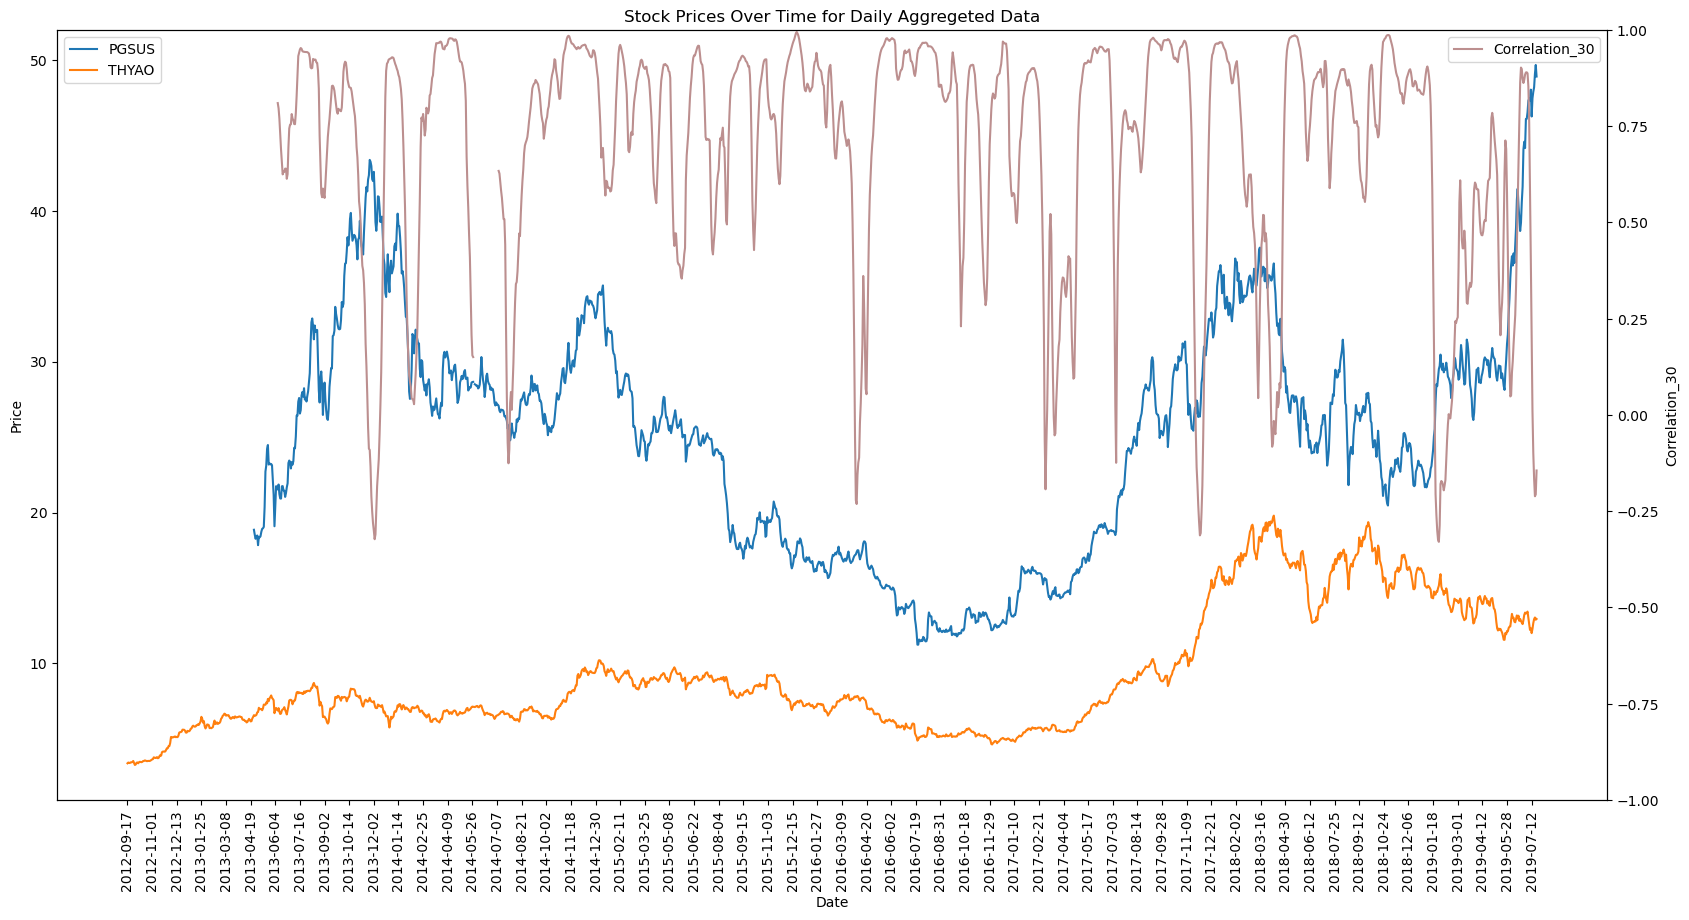

In [10]:
fig, ax1 = plt.subplots(figsize=(20,10))

ax1.plot(df_comparison.date, df_comparison["PGSUS"], label="PGSUS")
ax1.plot(df_comparison.date, df_comparison["THYAO"], label="THYAO")
ax1.set_ylabel('Price')

ax2 = ax1.twinx()
ax2.plot(df_comparison.date, df_comparison["Correlation_30"], label="Correlation_30", color="rosybrown")
ax2.set_ylim(-1, 1)
ax2.set_ylabel('Correlation_30')


ax1.set_title('Stock Prices Over Time for Daily Aggregeted Data')
ax1.set_xlabel('Date')

ticks_to_show = df_comparison['date'][::30]
ax1.set_xticks(ticks_to_show)
ax1.set_xticklabels(ticks_to_show, rotation=90)

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

The correlation of the prev 30 days is above. How about we increase the number of "30"?

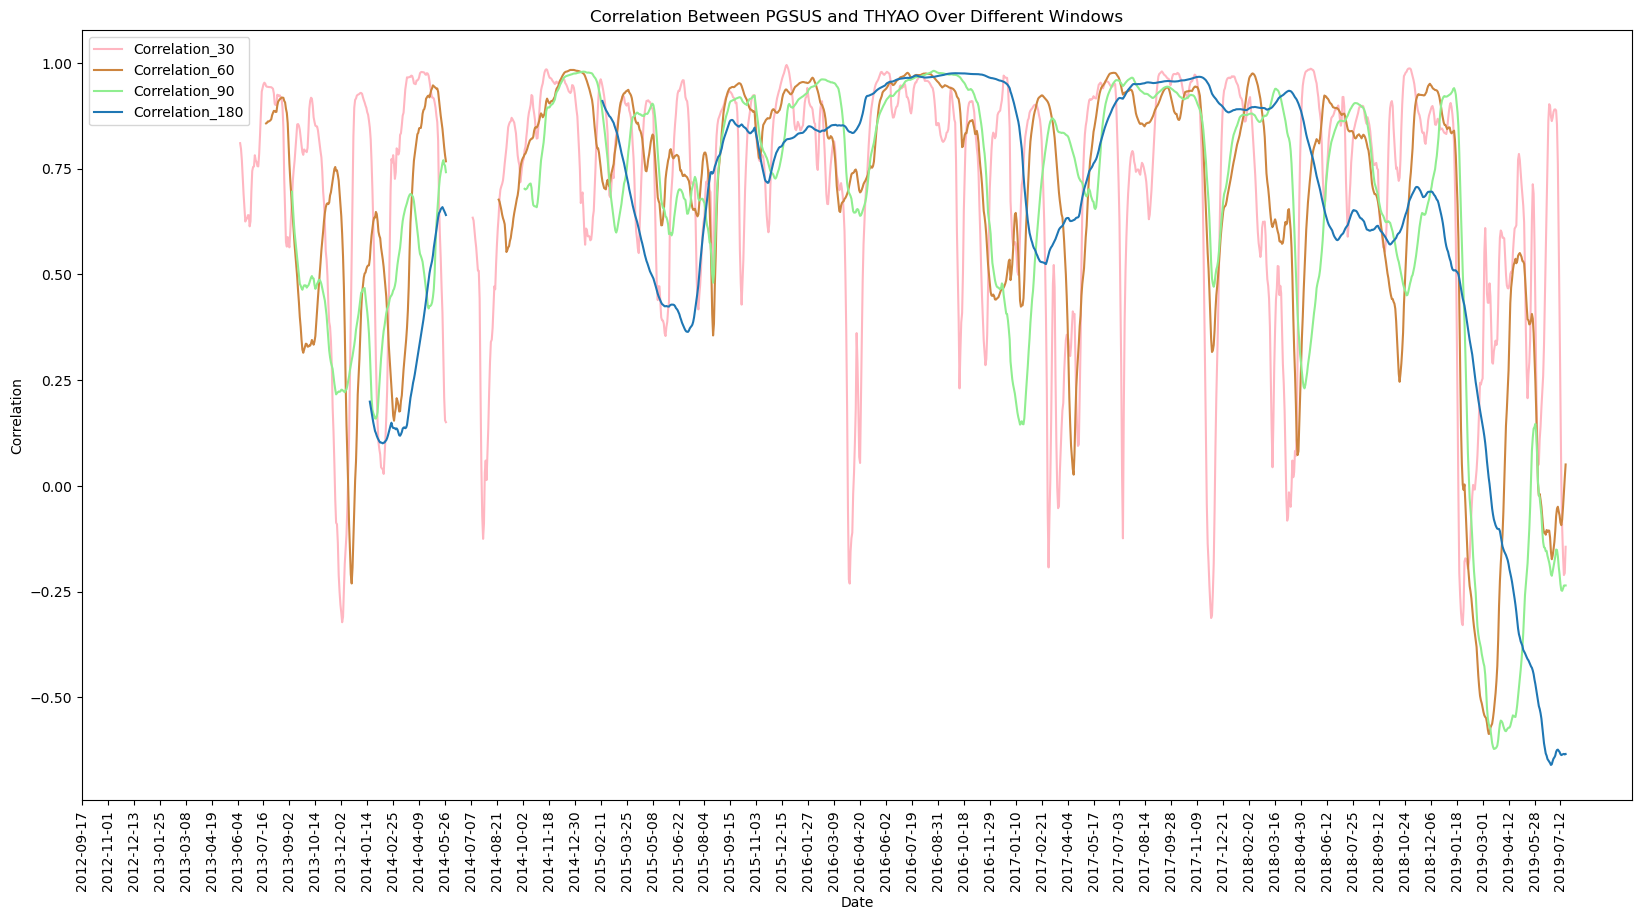

In [11]:
df_comparison['Correlation_60'] = df_comparison['PGSUS'].rolling(window=60).corr(df_comparison['THYAO'])
df_comparison['Correlation_90'] = df_comparison['PGSUS'].rolling(window=90).corr(df_comparison['THYAO'])
df_comparison['Correlation_180'] = df_comparison['PGSUS'].rolling(window=180).corr(df_comparison['THYAO'])

plt.figure(figsize=(20,10))

plt.plot(df_comparison.date, df_comparison["Correlation_30"], label="Correlation_30", color="lightpink")
plt.plot(df_comparison.date, df_comparison["Correlation_60"], label="Correlation_60", color="peru")
plt.plot(df_comparison.date, df_comparison["Correlation_90"], label="Correlation_90", color="lightgreen")
plt.plot(df_comparison.date, df_comparison["Correlation_180"], label="Correlation_180")

plt.title('Correlation Between PGSUS and THYAO Over Different Windows')
plt.xlabel('Date')
plt.ylabel('Correlation')

ticks_to_show = df[df.row_number == 1]['date'][::30] 
plt.xticks(ticks=ticks_to_show, rotation = 90)

plt.legend()

plt.show()


It can be easily observed from the visualizations, these two stock prices were highly correlated until late 2018's. All of the plots with different windows indicates that, the correlation between these two stocks are tend to decrease. 

- Discuss any observed deviations or patterns in correlation. Are there periods where
correlations seem unusually high or low?

From the provided plot, several observations can be made about the correlation between the stock prices of PGSUS and THYAO:

Initial Low Correlation: Towards the beginning of the timeline (around 2012-2014), the correlation is mostly around zero or even negative. During this period, the stock prices of PGSUS and THYAO seem to have limited synchronicity. This means that when one stock's price increased, the other didn't necessarily follow the same trend.

Increasing Positive Correlation: Post-2014, there's a noticeable shift towards a positive correlation, reaching as high as 1.0. This indicates that the stocks started to move in the same direction—when PGSUS's stock price went up, THYAO's did as well, and vice versa.

Periods of High Positive Correlation: There are distinct periods, such as between late 2015 to early 2017 and then again in late 2018 to 2019, where the correlation is strongly positive. These might be periods where external factors influenced the entire sector or market, causing both stocks to behave similarly.

Periods of Declining Correlation: There are moments where the correlation drops, such as the dip around mid-2017 and another in late 2019. This suggests that, during these times, the synchronicity between the two stock prices reduced.

Price Divergence: Notably, while the correlation remains positive in the latter half of the plot, there's a clear divergence in the actual stock prices. PGSUS's stock price appears to rise substantially, whereas THYAO's stock price remains relatively stable or even declines slightly.

Recent Synchronicity: Towards the end of the timeline, both stock prices seem to be rising, indicating a recent trend of both stocks benefiting from similar market conditions or factors.

In conclusion, while the stocks have shown periods of both positive and negative correlation, there's a prominent trend of increased synchronicity over time. However, correlation doesn't imply causation, and further analysis would be needed to determine the specific factors influencing these patterns.

#### 4.3. Principal Component Analysis (PCA)

- Apply PCA on the dataset to reduce dimensionality.

In [12]:
df_to_pca = df_comparison[df_comparison.PGSUS.notnull()][["date", "PGSUS", "THYAO", "Correlation_30"]].reset_index(drop=True)
df_to_pca = df_to_pca[["date", "PGSUS", "THYAO"]].copy().set_index("date")

In [13]:
df_numeric = df_to_pca


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric.fillna(0))

pca = PCA()
pca_data = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

pca_2 = PCA(n_components=2)
data_pca = pca_2.fit_transform(scaled_data)

df_pca_completed = pd.DataFrame(data_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca_completed

[0.73745695 0.26254305]


,Principal Component 1,Principal Component 2
0,-1.097623,-0.028683
1,-1.135531,-0.051413
2,-1.157880,-0.079366
3,-1.135013,-0.073544
4,-1.099094,-0.097842
...,...,...
1557,2.708083,1.565879
1558,2.783330,1.546446
1559,2.885155,1.608763
1560,2.914339,1.690547


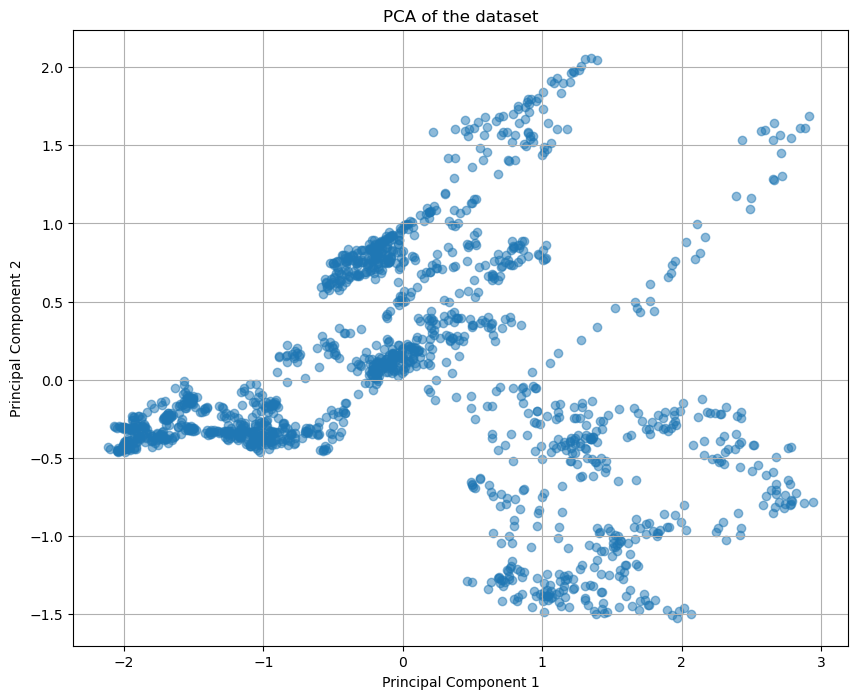

In [14]:
plt.figure(figsize=(10, 8))
plt.scatter(df_pca_completed['Principal Component 1'], df_pca_completed['Principal Component 2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of the dataset')
plt.grid(True)
plt.show()

#### 4.4. Inference with Google Trends

- Just as in the previous task, use Google Trends to cross-reference dates or periods with unusual patterns or correlations. This might offer insights into external events influencing the stock prices.

In [15]:
google=pd.read_csv("google_trends_thyao.csv", sep=";")
google.columns = ["Year-Month", "Search_Amount"]
google['Search_Amount'] = pd.to_numeric(google['Search_Amount'], errors='coerce').astype('Int64').fillna(0)

df_monthly = df_daily.copy()
df_monthly[["Year", "Month", "Day"]] = df_monthly.date.str.split("-", expand=True)
df_monthly["Year-Month"] = df_monthly["Year"] + "-"+ df_monthly["Month"]
df_monthly = df_monthly.groupby("Year-Month")[["THYAO"]].mean().reset_index()
df_monthly = df_monthly.merge(google, on="Year-Month", how="left")
df_monthly

,Year-Month,THYAO,Search_Amount
0,2012-09,3.415968,9
1,2012-10,3.491849,6
2,2012-11,3.999422,8
3,2012-12,5.282974,10
4,2013-01,5.879921,8
...,...,...,...
78,2019-03,13.576466,68
79,2019-04,14.009122,53
80,2019-05,12.498968,57
81,2019-06,12.891970,42


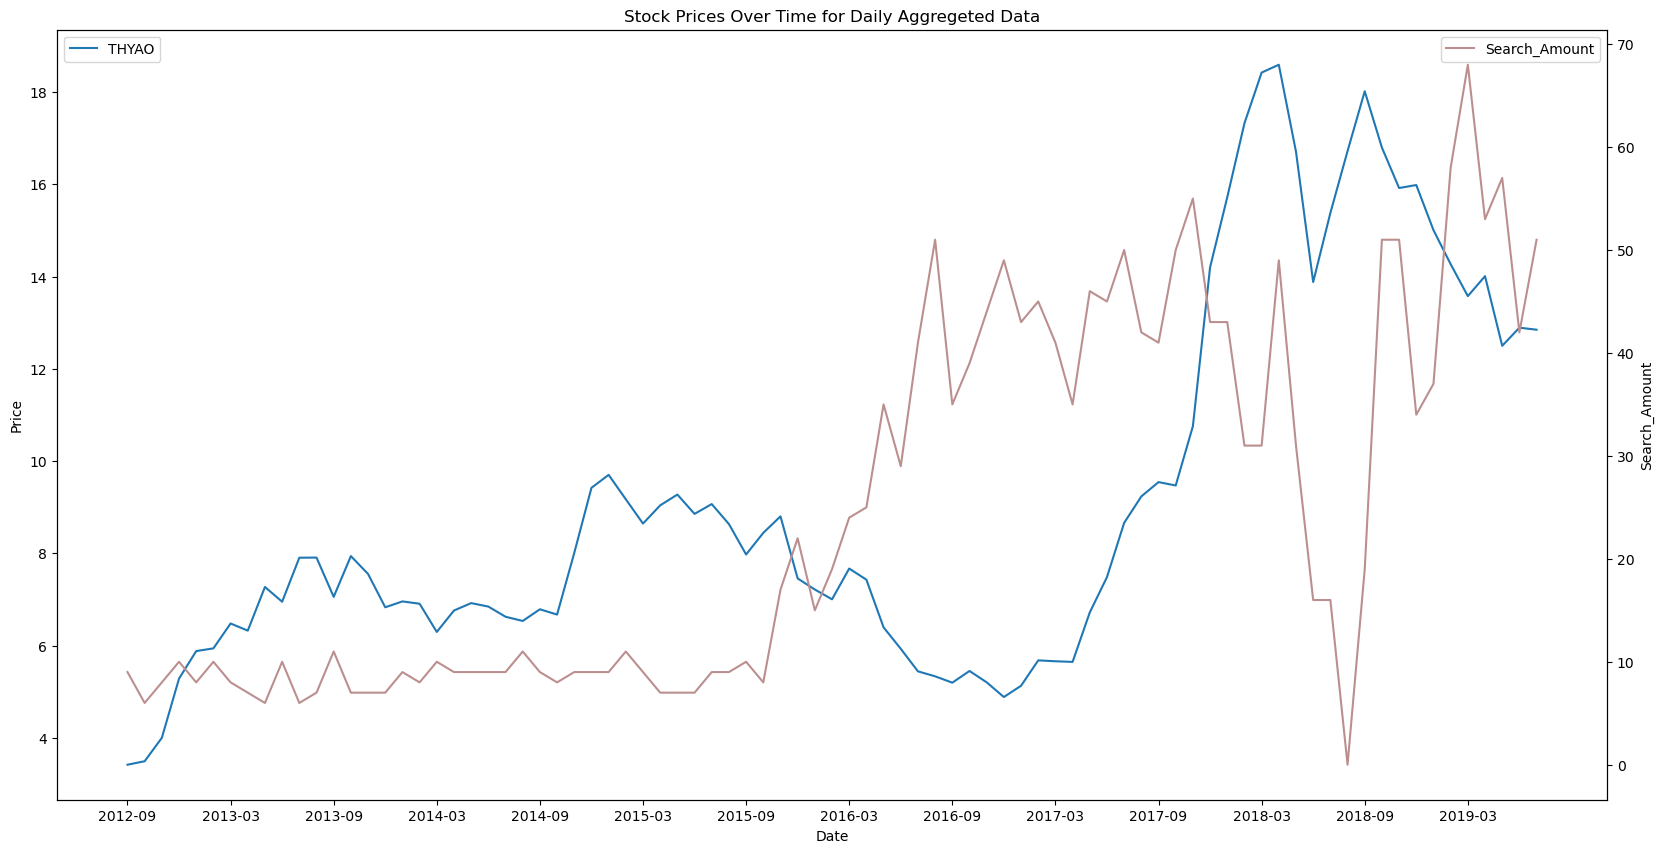

In [16]:
fig, ax1 = plt.subplots(figsize=(20,10))

ax1.plot(df_monthly["Year-Month"], df_monthly["THYAO"], label="THYAO")
ax1.set_ylabel('Price')

ax2 = ax1.twinx()
ax2.plot(df_monthly["Year-Month"], df_monthly["Search_Amount"], label="Search_Amount", color="rosybrown")
ax2.set_ylabel('Search_Amount')

ax1.set_title('Stock Prices Over Time for Daily Aggregeted Data')
ax1.set_xlabel('Date')


ticks_to_show = df_monthly['Year-Month'][::6] 
plt.xticks(ticks=ticks_to_show)

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

In [17]:
df_monthly['Correlation_12'] = df_monthly['Search_Amount'].rolling(window=12).corr(df_monthly['THYAO'])

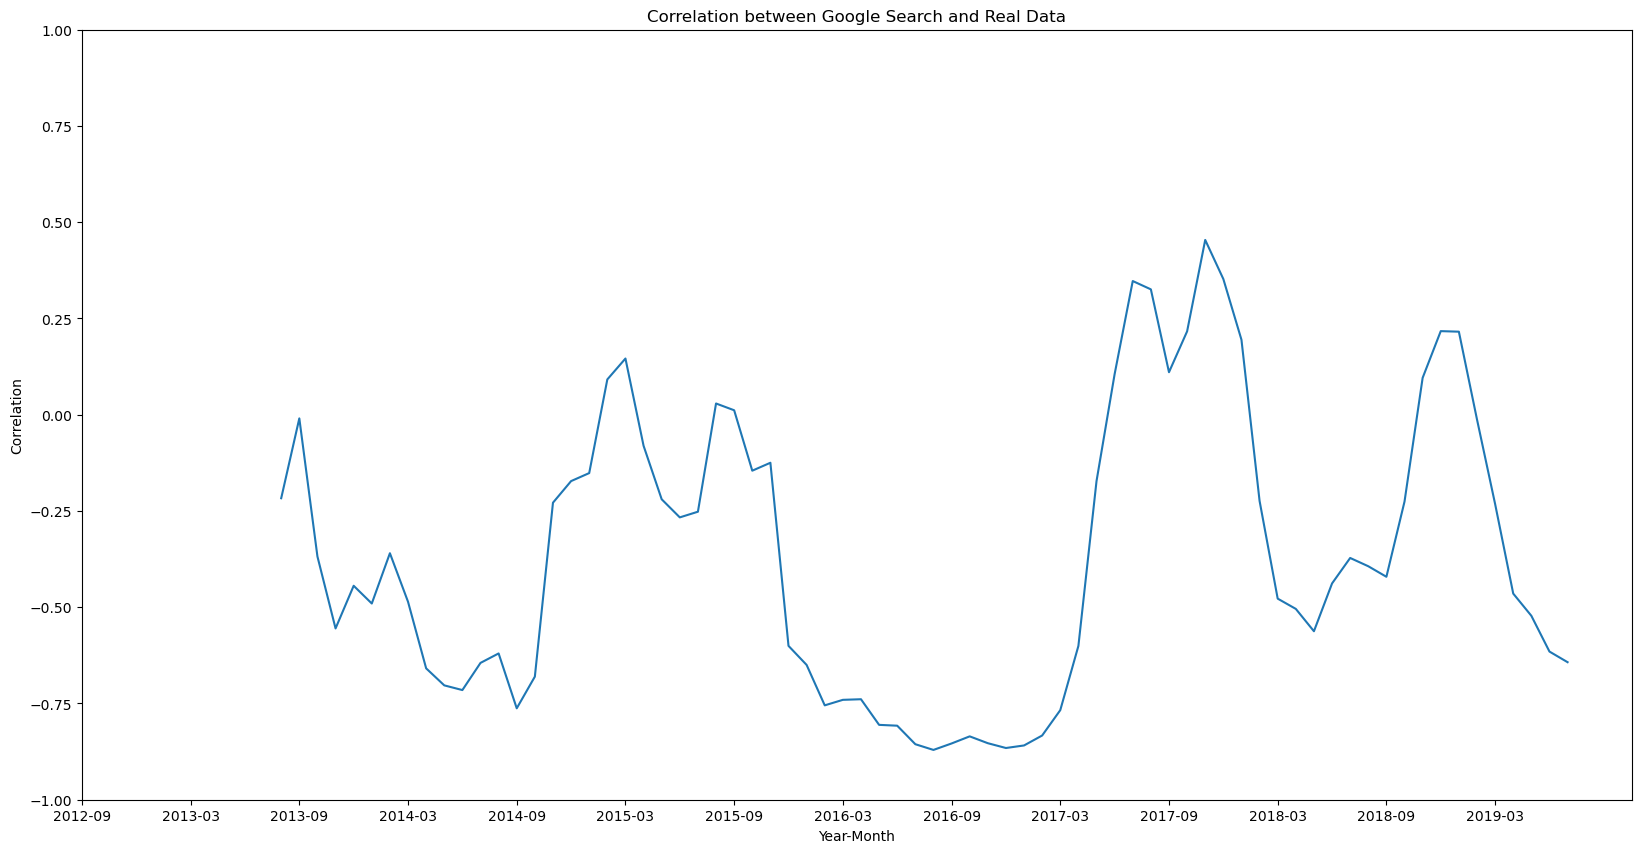

In [18]:
fig, ax1 = plt.subplots(figsize=(20,10))

plt.plot(df_monthly["Year-Month"], df_monthly["Correlation_12"], label="Correlation Rolling 12")
plt.xlabel('Year-Month')
plt.ylabel('Correlation')
plt.ylim(-1, 1)
plt.title('Correlation between Google Search and Real Data')
ticks_to_show = df_monthly['Year-Month'][::6] 
plt.xticks(ticks=ticks_to_show)

plt.show()

- Systematically draw parallels between deviations in data patterns and spikes or news items from Google Trends.

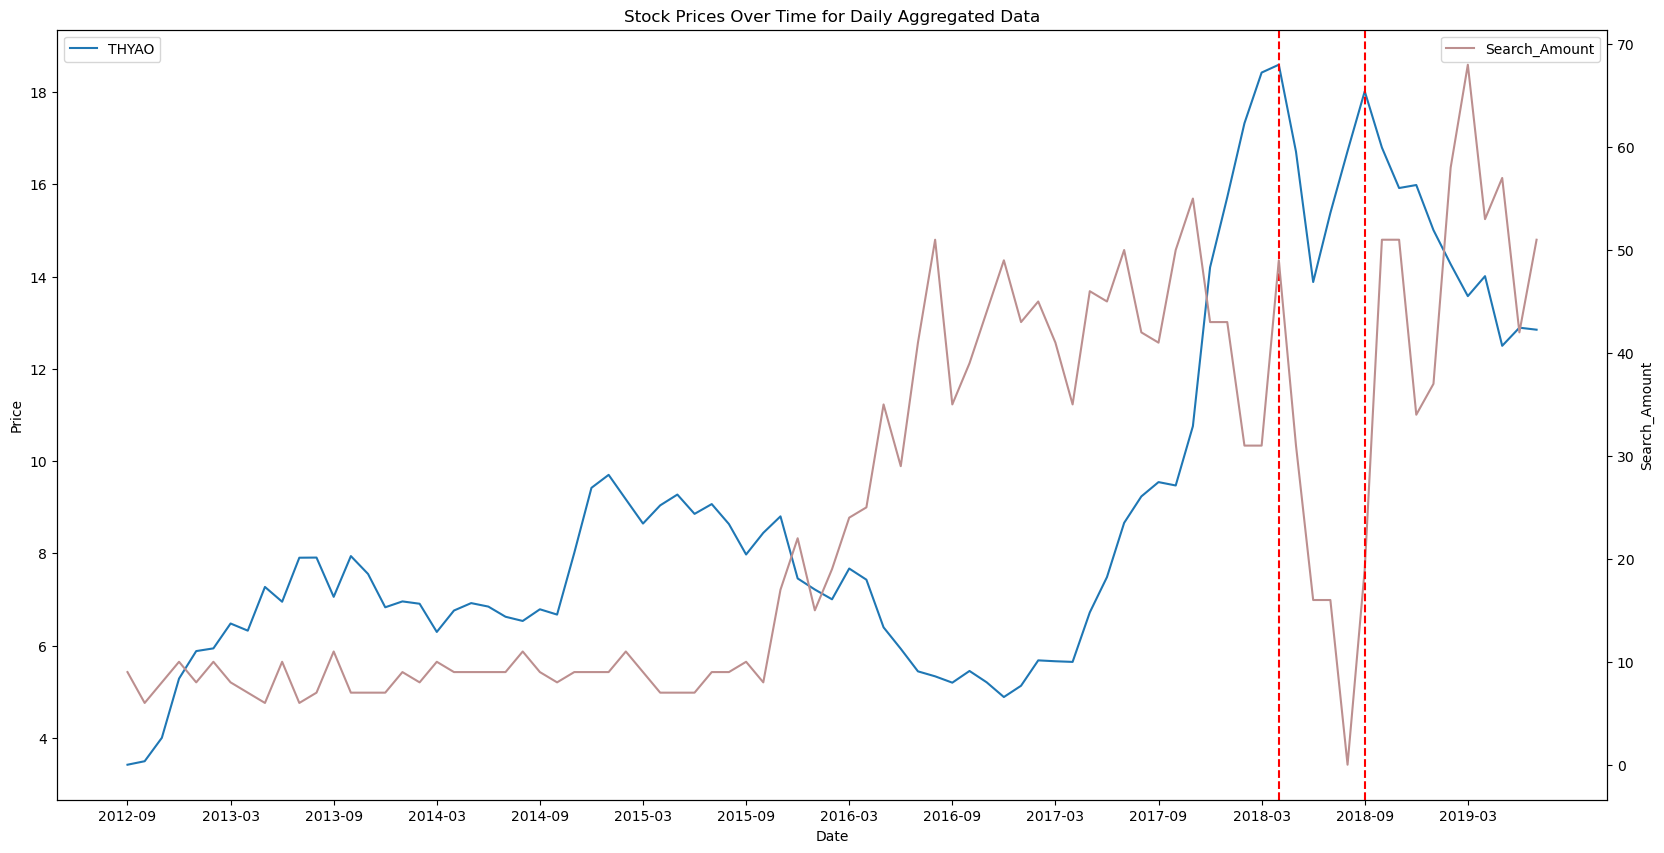

In [19]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(20,10))

ax1.plot(df_monthly["Year-Month"], df_monthly["THYAO"], label="THYAO")
ax1.set_ylabel('Price')

ax2 = ax1.twinx()
ax2.plot(df_monthly["Year-Month"], df_monthly["Search_Amount"], label="Search_Amount", color="rosybrown")
ax2.set_ylabel('Search_Amount')

ax1.set_title('Stock Prices Over Time for Daily Aggregated Data')
ax1.set_xlabel('Date')

ticks_to_show = df_monthly['Year-Month'][::6]
plt.xticks(ticks=ticks_to_show)

# Drawing vertical lines
ax1.axvline(x='2018-04', color='red', linestyle='--')
ax2.axvline(x='2018-09', color='red', linestyle='--')

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()
